In [43]:
import os
import sys
script_path = "../Libs/"
sys.path.append(os.path.abspath(script_path))
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pylab
import librosa.display
import scipy.io.wavfile as wavio
from mel_utils import get_mel_spectrum, get_filterbanks, powspec, get_filterbank_from_midfreqs, framesig
from scipy import signal # audio processing
from scipy.fftpack import dct
import librosa # library for audio
import skimage

## This Code is to demostrate how to vistualizing speech data for analyzing speech

In [42]:
# !pip install scikit-image

     |████████████████████████████████| 12.5 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 625 kB/s eta 0:00:01
     |████████████████████████████████| 145 kB 857 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 1.8 MB/s eta 0:00:01


In [2]:
"""
very basic spectrogram drawing
# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('y.wav')

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with piano music')

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

plot.show()
"""

"\nvery basic spectrogram drawing\n# Read the wav file (mono)\n\nsamplingFrequency, signalData = wavfile.read('y.wav')\n\n# Plot the signal read from wav file\n\nplot.subplot(211)\n\nplot.title('Spectrogram of a wav file with piano music')\n\nplot.plot(signalData)\n\nplot.xlabel('Sample')\n\nplot.ylabel('Amplitude')\n\nplot.subplot(212)\n\nplot.specgram(signalData,Fs=samplingFrequency)\n\nplot.xlabel('Time')\n\nplot.ylabel('Frequency')\n\nplot.show()\n"

In [3]:
def log_specgram(audio, sample_rate, window_size=10, 
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    _, _, spec = signal.spectrogram(audio, fs=sample_rate,
                                    window='hann', nperseg=nperseg, noverlap=noverlap,
                                    detrend=False)
    return np.log(spec.T.astype(np.float32) + eps)

def audio_to_data(path):
    # we take a single path and convert it into data
    sample_rate, audio = wavfile.read(path)
    spectrogram = log_specgram(audio, sample_rate, 10, 0)
    return spectrogram.T

In [4]:
"""
sig, fs = librosa.load('path_to_my_wav_file')   
# make pictures name 
save_path = 'test.jpg'

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
S = librosa.feature.melspectrogram(y=sig, sr=fs)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
pylab.close()
"""

"\nsig, fs = librosa.load('path_to_my_wav_file')   \n# make pictures name \nsave_path = 'test.jpg'\n\npylab.axis('off') # no axis\npylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge\nS = librosa.feature.melspectrogram(y=sig, sr=fs)\nlibrosa.display.specshow(librosa.power_to_db(S, ref=np.max))\npylab.savefig(save_path, bbox_inches=None, pad_inches=0)\npylab.close()\n"

In [46]:
test_wav_file = "./raw_wav/Mel_Bandpass_Tone_0724a.wav"

In [47]:
def run_librosa_draw_melspectrogram(wavfile):
    sig, fs = librosa.load(wavfile)   
    # make pictures name 
    save_path = './test.jpg'
#     pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
    S = getMelSpectrogram(sig,fs)
    print(S.shape)
#     plt.show(S)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max),y_axis='mel', fmax=8000, x_axis='time')
#     pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#     pylab.close()

In [48]:
def getMelSpectrogram(signal, samplerate):
    S_ = librosa.feature.melspectrogram(y=signal, sr=samplerate, n_fft=1024, win_length=400, hop_length=400)
    return S_

(128, 552)


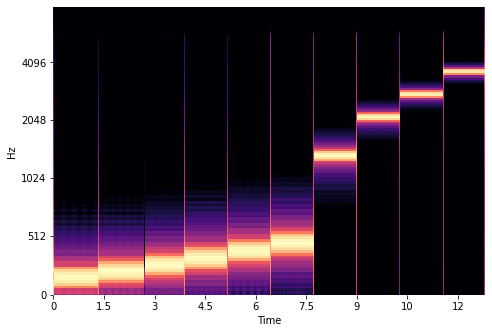

In [49]:
run_librosa_draw_melspectrogram(test_wav_file)

In [50]:
def run_drawing_4(wavfile):
    sr, sig = wavio.read(wavfile)
    framed_sig = framesig(sig,400,400)
    print("length of framed_sig is {}".format(len(framed_sig)))
    sample_len = 513
    mid_banks = [0.0,195.0985245,251.8401972,312.1788118,376.342384,
                 444.5733837,517.1296516,1550.447293,2554.078667,
                 3461.030019,4620.759758,8000.0]
    melfb = get_filterbank_from_midfreqs(midFreqs=mid_banks)
    sig_powspec = powspec(framed_sig,1024)
    sig_powspec = np.split(sig_powspec.T,[0,sample_len],axis=0)[1]
    print(melfb.shape)
    print(sig_powspec.shape)
    sig_specgram = np.dot(melfb,sig_powspec)
    librosa.display.specshow(librosa.power_to_db(sig_powspec, ref=np.max),y_axis='mel', fmax=8000, x_axis='time')
    log_specgram = 10*np.log(sig_specgram+1e-9)

    

In [51]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

length of framed_sig is 400
[   0.         195.0985245  251.8401972  312.1788118  376.342384
  444.5733837  517.1296516 1550.447293  2554.078667  3461.030019
 4620.759758  8000.       ]
12
(10, 513)
(513, 400)


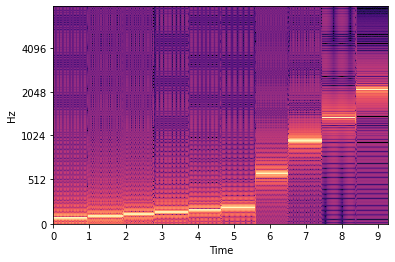

In [52]:
run_drawing_4(test_wav_file)

In [53]:
def run_drawing_3(wavfile):
    sr, sig = wavio.read(wavfile)
    framed_sig = framesig(sig,400,400)
    print("length of framed_sig is {}".format(len(framed_sig)))
    sample_len = 513
    mid_banks = [0.0,195.0985245,251.8401972,312.1788118,376.342384,
                 444.5733837,517.1296516,1550.447293,2554.078667,
                 3461.030019,4620.759758,8000.0]
    melfb = get_filterbank_from_midfreqs(midFreqs=mid_banks)
    sig_powspec = powspec(framed_sig,1024)
    sig_powspec = np.split(sig_powspec.T,[0,sample_len],axis=0)[1]
    print(melfb.shape)
    print(sig_powspec.shape)
    
    sig_specgram = np.dot(melfb,sig_powspec)
    log_specgram = 10*np.log(sig_specgram)
    librosa.display.specshow(librosa.power_to_db(sig_powspec, ref=np.max),y_axis='mel', fmax=8000, x_axis='time')
    plt.figure(figsize=(20,8))
    plt.subplot(211)
    plt.title('spectrogram of wav file')
    plt.title('wavform and spectrogram of wav file')
    plt.plot(sig)
    plt.xlabel('Sample Points')
    plt.ylabel('Amplitude')
    plt.subplot(212)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.imshow(log_specgram)

length of framed_sig is 400
[   0.         195.0985245  251.8401972  312.1788118  376.342384
  444.5733837  517.1296516 1550.447293  2554.078667  3461.030019
 4620.759758  8000.       ]
12
(10, 513)
(513, 400)


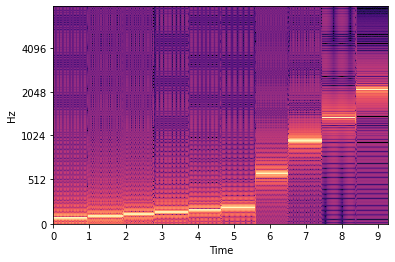

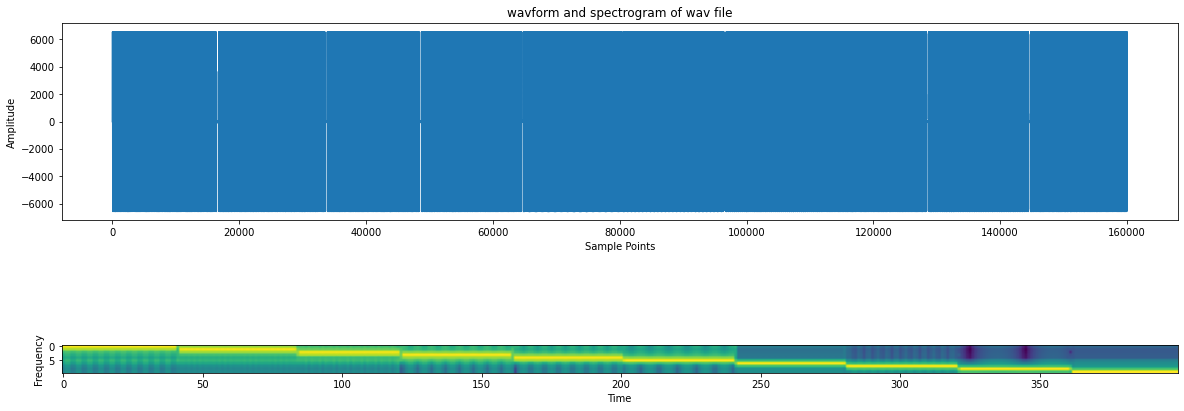

In [54]:
run_drawing_3(test_wav_file)

In [25]:
def run_drawing(wavfile):
    sr, sig = wavio.read(wavfile)
    plt.figure(figsize=(14,10))
    plt.subplot(211)
    plt.title('wavform and spectrogram of wav file')
    plt.plot(sig)
    plt.xlabel('Sample Points')
    plt.ylabel('Amplitude')
    plt.subplot(212)
    plt.specgram(sig,Fs=sr)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

/home/user/.conda/envs/pytorchenv151/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


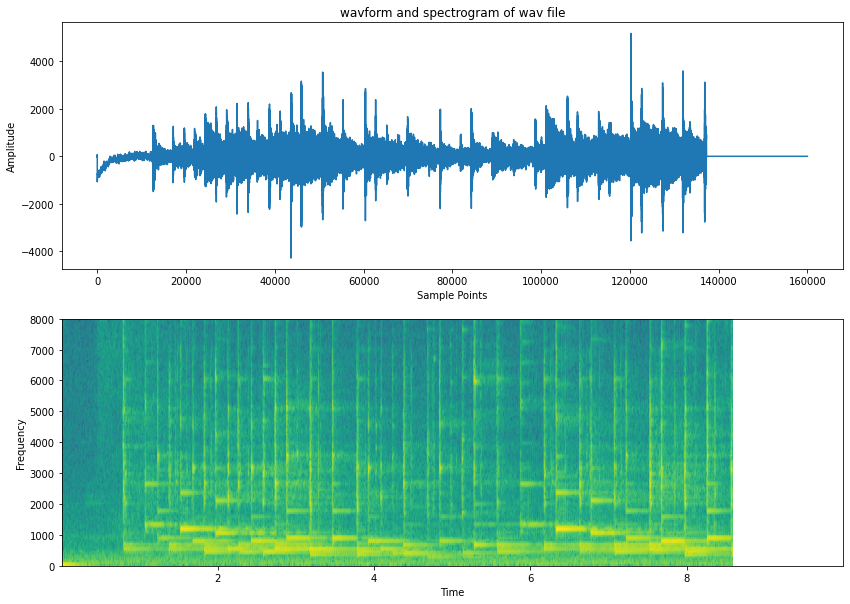

In [26]:
# test_wav = "./raw_wav/Flipped.dat.wav"
run_drawing(test_wav_file)

In [ ]:
# if __name__ == "__main__":
#     run_drawing()